# **AP157 Machine Learning Lab Assignment**
## Module A.3: Dimensionality Reduction -- Principal Component Analysis of SDSS Galaxy Spectra

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1 and 2 are worth 25 and 75 points, respectively).

_Credits_: This assignment is based on the scikit-learn tutorial "Dimensionality Reduction of Astronomical Spectra" ([link](https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/tutorial/astronomy/dimensionality_reduction.html))

### Student Information

_Full Name (Last Name, First Name)_: Quiamjot, Allyn Christian\
_Student No._: 2021-07198\
_Section_: TX-2

### Submission Information

_Date and Time Submitted (most recent upload)_: March 5, 2024 11:07 PM

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: ALLYN CHRISTIAN I. QUIAMJOT**

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/25
* Part 2 - []/75

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

For this assignment, you will work with galaxy spectra data from the
Sloan Digital Sky Survey (SDSS). First, you need to make a copy of the file ```spec4000_use.npz``` and save it to a folder in your **own Google Drive**. This file is available from the AP157 Machine Learning Google Drive (under the Datasets folder).

The code cells below will (1) mount your Google Drive and (2) load ```spec4000_corrected.npz``` from your Google Drive folder.

First, mount the Google Drive where you saved the .npy file.

When you run this cell, you will be asked to sign in to your Google account and you will get an authorization code. Paste the code on the provided cell to mount the Google Drive.

In [309]:
# from google.colab import drive
# drive.mount("/content/drive")

Run this command to list the directories in your Google Drive and check that the mount was successful.

In [310]:
# !ls drive/My\ Drive

Define the directory path to the location of the file, i.e. if it is in a
folder named "AP157" under My Drive, then the file path will be "/content/drive/My Drive/AP157". Change the string variable in the code cell below, as needed:

In [311]:
# file_path = "/content/drive/My Drive/AP157/"

Now, we can load the file using $\tt numpy$'s $\tt load$ function below.


In [312]:
import numpy as np
data = np.load('spec4000_corrected.npz')

The NpzFile object is a dictionary-like object which can be queried for its list of arrays and the arrays themselves ([reference](https://numpy.org/doc/stable/reference/generated/numpy.savez.html)). Our object contains two arrays: ``spec_recons`` - 4000 reconstructed SDSS spectra each with 1000 attributes (flux in units of $10^{-17}$ erg cm$^{-2}$ s$^{-1}$ Å$^{-1}$) and ``wavelength`` - array of wavelengths (in units of Angstroms) corresponding to these attributes.

In [313]:
data.files

['spec_recons', 'wavelength']

In [314]:
np.shape(data['spec_recons']), np.shape(data['wavelength'])

((4000, 1000), (1000,))

Let's plot the first few spectra to visualize our data

In [315]:
from matplotlib import pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Sample SDSS spectra')

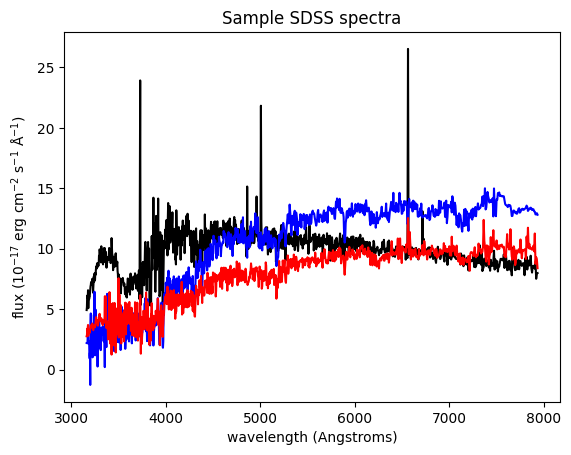

In [316]:
wavelength = data['wavelength']
flux0 = data['spec_recons'][0,:]
flux1 = data['spec_recons'][1,:]
flux2 = data['spec_recons'][2,:]

plt.plot(wavelength, flux0, 'k-')
plt.plot(wavelength, flux1, 'b-')
plt.plot(wavelength, flux2, 'r-')
plt.ylabel("flux ($10^{-17}$ erg cm$^{-2}$ s$^{-1}$ Å$^{-1}$)")
plt.xlabel("wavelength (Angstroms)")
plt.title("Sample SDSS spectra")

#### PART 1 - Get mean normalized spectrum *(25 pts.)*

Plot the mean spectrum by first normalizing the spectra and plot the mean and standard deviation. For this, you may use the ``normalize`` function in scikit-learn's preprocessing module [(documentation)](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html). Describe the mean spectrum and note wavelengths with the highest variation across the sample. What is the reason for this variation?


Text(0.5, 1.0, 'Mean Spectrum')

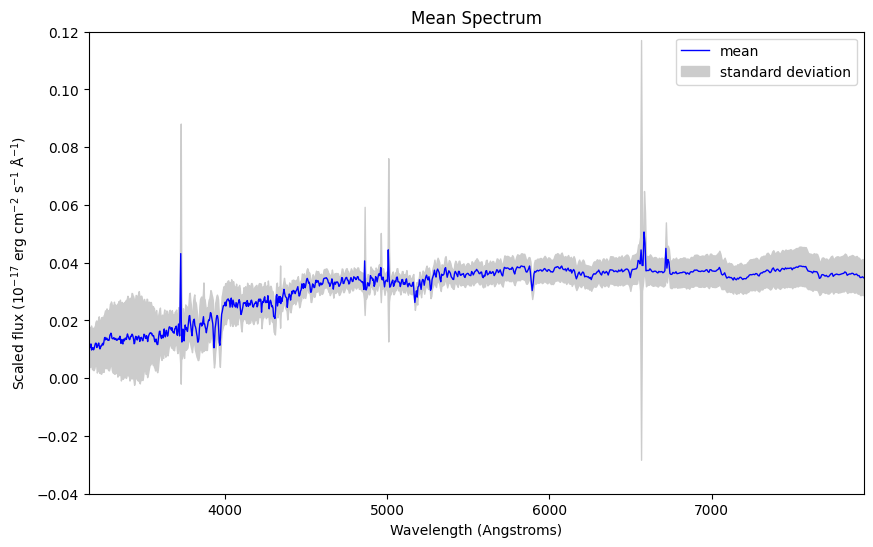

In [317]:
from sklearn.preprocessing import normalize

normalized_spec_recons = normalize(data['spec_recons'])     #   all spectra is normalized. The maximum value is set to 1 and all other values scaled accordingly
mu = normalized_spec_recons.mean(0)     #   mean along the vertical axis (x=0) is calculated 
std = normalized_spec_recons.std(0)     #   standard dev along the vertical axis (x=0) is calculated. This determines spread of values around the mean

#   plotting the mean spectrum and its corresponding standard deviations
plt.figure(figsize=(10,6))
plt.plot(wavelength, mu, color = 'blue',linewidth=1, label='mean')
plt.fill_between(wavelength, mu - std, mu + std, color='#CCCCCC', label ='standard deviation')
plt.ylim(-0.04,0.12)
plt.xlim(wavelength[0],wavelength[-1])
plt.legend()
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Scaled flux ($10^{-17}$ erg cm$^{-2}$ s$^{-1}$ Å$^{-1}$)')
plt.title('Mean Spectrum')

The mean spectrum has several spikes and very sharp peaks at some wavelengths. The most notable wavelengths with these peaks are around 3700, 4900, 5000, and 6600. Moreover, the wavelength with the highest standard deviation is around 6600. The next noteworthy wavelengths are ~3700, 4900, and 5000. The variation describes how much the flux differs from the mean at a specific wavelength. The higher the variation, the farther some values are from the mean. In the context of the data, higher variation could mean that the galaxy characteristics are more distinct at these wavelengths. It might be caused by their chemical composition, temperature, and more. 

#### PART 2 - Get principal components *(75 pts.)*

Perform Principal Component Analysis (PCA) and visualize the top principal components:
1. Get the first 4 principal components using the ``PCA`` function in scikit-learn's decomposition module [(documentation)](https://scikit-learn.org/0.15/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA). Make sure to use the normalized spectra as input. *(25 pts.)*


In [318]:
from sklearn.decomposition import PCA       #   importing the class PCA from module sklearn.decomposition

pca = PCA(n_components=4)       #   creates a PCA variable with 4 principal components

#   the PCA model is fitted into the normalized spectra.
X_projected = pca.fit_transform(normalized_spec_recons)     #   X_projected contains 4 principal components. each principal component has 4000 transformed data  

2. Plot the first two principal components (coefficient 1 in the x axis and coefficient 2 in the y axis). Make sure to label the axes and good to set x and y axis limits to be equal. *(25 pts.)*

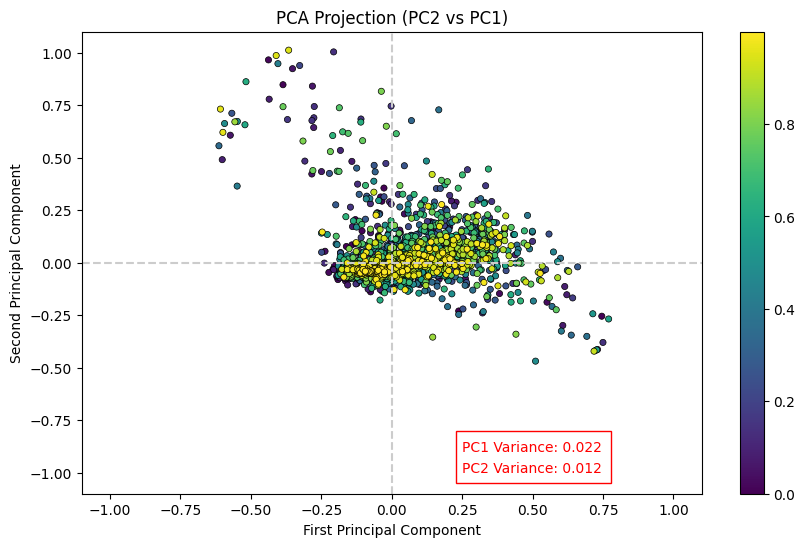

PC1 %var contribution:  51.6 %
PC2 %var contribution:  28.37 %
PC3 %var contribution:  11.96 %
PC4 %var contribution:  8.07 %


In [319]:
import matplotlib.patches as patches

pc1_Var = round(np.var(X_projected[:,0], ddof=1),3)      #   calculating variance for 1st principal component and rounding to 4 decimal places
pc2_Var = round(np.var(X_projected[:,1], ddof=1),3)      #   calculating variance for 2nd principal component and rounding to 4 decimal places
                                                        #   degree of freedom is 1 since we are considering sample variance

#   plotting first two principal components (PCs)
plt.figure(figsize=(10,6))
lim = 1.1           #   edit to set value of ±x and ±y limits. 
c_values = np.array(np.arange(0,4000))/4000
plt.scatter(X_projected[:,0], X_projected[:,1], s=20, c=c_values, cmap=plt.cm.viridis, edgecolors='black', linewidth=0.5)   #   1st PC is in x-axis, 2nd PC is in y-axis
plt.axvline(x=0, color='#CCCCCC', linestyle='--')       #   plotting vertical line along y-axis (x=0)
plt.axhline(y=0, color='#CCCCCC', linestyle='--')       #   plotting horizontal line along x-axis (y=0)
plt.colorbar()          #   adding color bar
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Projection (PC2 vs PC1)')
plt.xlim(-lim,lim)
plt.ylim(-lim,lim)

plt.text(0.25,-0.9,'PC1 Variance: '+str(pc1_Var), color='red')      #   pc1 variance
plt.text(0.25,-1,'PC2 Variance: '+str(pc2_Var), color='red')        #   pc2 variance
bbox_x, bbox_y = 0.23, -1.05        #   set position of rectangle
bbox_width, bbox_height = 0.55, 0.25        # set height and width of rectangle
common_bbox = patches.Rectangle((bbox_x, bbox_y), bbox_width, bbox_height,
                                linewidth=1, edgecolor='r', facecolor='none')
plt.gca().add_patch(common_bbox)
plt.show()

#   calculating variance of all PCs without rounding 
pc1_var = np.var(X_projected[:,0], ddof=1)
pc2_var = np.var(X_projected[:,1], ddof=1)
pc3_var = np.var(X_projected[:,2], ddof=1)
pc4_var = np.var(X_projected[:,3], ddof=1)
print('PC1 %var contribution: ',round((pc1_var*100/(pc2_var+pc3_var+pc4_var+pc1_var)),2),'%')
print('PC2 %var contribution: ',round((pc2_var*100/(pc2_var+pc3_var+pc4_var+pc1_var)),2),'%')
print('PC3 %var contribution: ',round((pc3_var*100/(pc2_var+pc3_var+pc4_var+pc1_var)),2),'%')
print('PC4 %var contribution: ',round((pc4_var*100/(pc2_var+pc3_var+pc4_var+pc1_var)),2),'%')

# print(pc1_var)
# print(pc2_var)
# print(pc3_var)
# print(pc4_var)

The variance of the four principal components were calculated. The higher variance means the component contributes more to the overall variance to the data. This also means that the characteristics associated with the principal component are more distinct. Thus, the component with high variance is well suited to be used to classify and differentiate the galaxies from each other. 

In this case, the first principal component contributes 51% of the total variance among the 4 components. It is the highest among the components thus it is the best component to be used to classify the galaxies. The second principal component contributes 28%, making it second best in classifying the galaxies.

<!-- Points that are close together in space and share similar colors likely belong to the same group or category of galaxies. On the other hand, points that have very different color from its neighbors might be outliers or exceptions which need further investigation. In the plot, yellow points cluster together near the origin. This indicates that these galaxies may belong in one category. Green and gradients of yellow-green appear around the yellow cluster. This might indicate another cluster or simply an unknown relationship of unknown variables. Points with neighboring colors very different from each other can be found at the top and bottom part of the scatter plot. These are outliers and somewhat 'difficult' to classify. -->

3. Plot the first 4 eigenvectors together with the mean spectrum. Add an arbitrary y-offset between the spectra for clarity. *(25 pts.)*

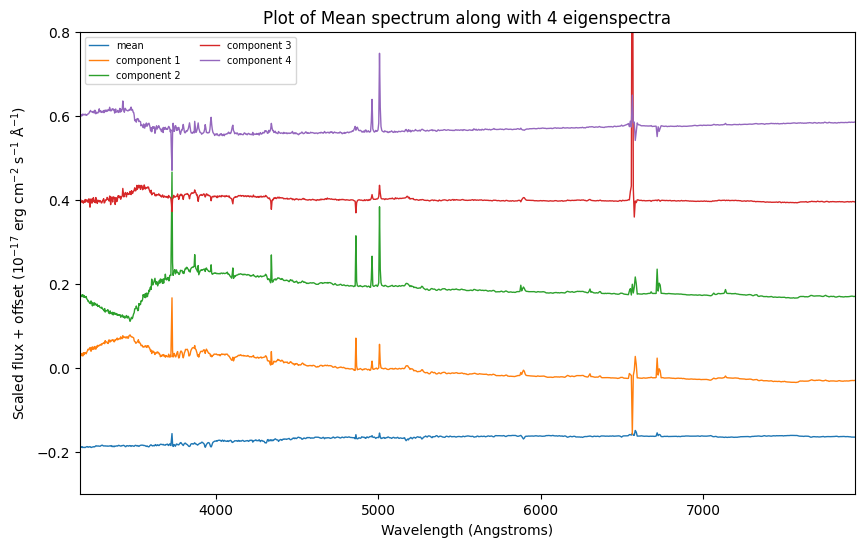

In [320]:
plt.figure(figsize=(10,6))
plt.plot(wavelength, pca.mean_ - 0.2, label='mean',linewidth=1)     #   plotting the mean

#   loop that plots the 4 principal component eigenvectors. 
for k in range(4):
    plt.plot(wavelength, pca.components_[k]+0.2*k, label='component '+str(k+1),linewidth=1)     #   the y values has an offset factor of 0.2 for visualization purposes

plt.legend(fontsize='7', ncol=2, loc='upper left')
plt.ylim(-0.3, 0.8)
plt.xlim(wavelength[0],wavelength[-1])
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Scaled flux + offset ($10^{-17}$ erg cm$^{-2}$ s$^{-1}$ Å$^{-1}$)')
plt.title('Plot of Mean spectrum along with 4 eigenspectra')
plt.show()

The first 4 eigenvectors of the principal components are plotted alongside the mean. Each has a spike at different wavelengths that can be used to best describe a characteristic component of a galaxy. For example, component 3 has a notable spike around 6600 angstroms. This means that component 3 best describes the characteristic of the galaxy associated with the 6600-angstrom peak in the emission spectra.

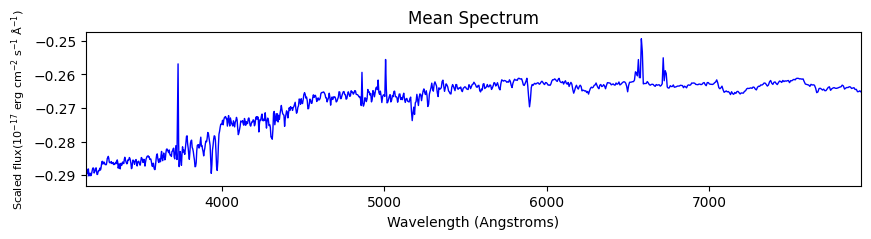

In [321]:
#   plotting mean spectrum separately
plt.figure(figsize=(10,2))
plt.plot(wavelength, pca.mean_ - 0.3, label='mean',linewidth=1,color='blue')
plt.xlim(wavelength[0],wavelength[-1])
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Scaled flux($10^{-17}$ erg cm$^{-2}$ s$^{-1}$ Å$^{-1}$)',fontsize=8)
plt.title('Mean Spectrum')
plt.show()